In [1]:
#Import libraries

import pandas as pd #Pandas for data loading
import numpy as np #Numpy for easy matrix multiplication
import matplotlib.pyplot as plt # Matplotlib for visualiziation
from sklearn.datasets import load_breast_cancer, make_moons #Loading breast_cancer dataset, classificaiton model
from sklearn.model_selection import train_test_split, GridSearchCV #test train_split + grid search
from sklearn.preprocessing import StandardScaler #Scaler
from sklearn.svm import SVC #
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc #Evaluation metrics
from sklearn.pipeline import Pipeline

In [2]:
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# TODO: Create a pipeline with StandardScaler and SVC
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svm', SVC(kernel = "linear"))  # Support Vector Classifier, specify kernel
])

In [6]:
# TODO: Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [7]:
# TODO: Make predictions
y_pred = pipeline.predict(X_test)

In [8]:
    # TODO: Evaluate the model (accuracy, confusion matrix, classification report)
print(classification_report(y_test, y_pred))
print("\n\n\n")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171







In [9]:
    # TODO: Plot two features and the decision boundary
    #plt.plot()
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

In [10]:
type(X)

numpy.ndarray

In [11]:
from sklearn import svm

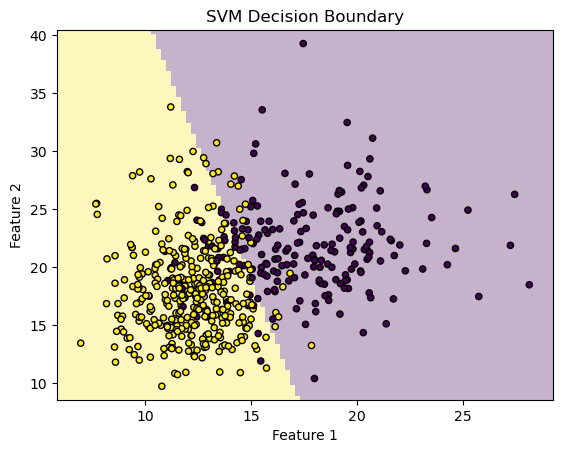

In [12]:
#Create new model only using two features
Xplt = X[:,:2] #X using two features
X_train_plt, X_test_plt, y_train_plt, y_test_plt = train_test_split(Xplt, y, test_size=0.3, random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train_plt, y_train_plt)

fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
    clf,
    Xplt,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    alpha=0.3,
)
ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('SVM Decision Boundary')
plt.show()